In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
os.chdir('../')

In [2]:
template_record = {
    'walk-medium': {
        'epoch': None,
        'return': None,
        'result': None
    },
    'run-medium': {
        'epoch': None,
        'return': None,
        'result': None
    },
    'walk-medium-replay': {
        'epoch': None,
        'return': None,
        'result': None
    },
    'run-medium-replay': {
        'epoch': None,
        'return': None,
        'result': None
    },
}

In [3]:
rsp_record = deepcopy(template_record)

def rsp_parse(checkpoint_path):
    record = []
    for path in os.listdir(checkpoint_path):
        with open(os.path.join(checkpoint_path, path, 'train.log'), 'r') as file:
            for line in file.readlines():
                blocks = line.strip().split('|')
                if blocks[0].strip() == 'Test':
                    result = float(blocks[3].split(':')[1].strip())
                    record.append(result)
    return record

record = rsp_parse('checkpoint/rsp-walk-medium')
rsp_record['walk-medium']['result'] = np.array(record)

record = rsp_parse('checkpoint/rsp-run-medium')
rsp_record['run-medium']['result'] = np.array(record)

record = rsp_parse('checkpoint/rsp-walk-medium-replay')
rsp_record['walk-medium-replay']['result'] = np.array(record)

record = rsp_parse('checkpoint/rsp-run-medium-replay')
rsp_record['run-medium-replay']['result'] = np.array(record)

In [4]:
csac_record = deepcopy(template_record)

def csac_parse(checkpoint_path):
    record = {
        'evaluate': {
            'epoch': [],
            'return': []
        },
        'test': []
    }
    for path in os.listdir(checkpoint_path):
        epochs = []
        results = []
        with open(os.path.join(checkpoint_path, path, 'train.log'), 'r') as file:
            for line in file.readlines():
                blocks = line.strip().split('|')
                if blocks[0].strip() == 'Evaluate':
                    epoch = int(blocks[1].split(':')[1].strip())
                    result = float(blocks[4].split(':')[1].strip())
                    epochs.append(epoch)
                    results.append(result)
                elif blocks[0].strip() == 'Test':
                    result = float(blocks[3].split(':')[1].strip())
                    record['test'].append(result)
        record['evaluate']['epoch'].append(epochs)
        record['evaluate']['return'].append(results)
    return record

record = csac_parse('checkpoint/csac-walk-medium')
csac_record['walk-medium']['epoch'] = np.array(record['evaluate']['epoch'])
csac_record['walk-medium']['return'] = np.array(record['evaluate']['return'])
csac_record['walk-medium']['result'] = np.array(record['test'])

record = csac_parse('checkpoint/csac-run-medium')
csac_record['run-medium']['epoch'] = np.array(record['evaluate']['epoch'])
csac_record['run-medium']['return'] = np.array(record['evaluate']['return'])
csac_record['run-medium']['result'] = np.array(record['test'])

record = csac_parse('checkpoint/csac-walk-medium-replay')
csac_record['walk-medium-replay']['epoch'] = np.array(record['evaluate']['epoch'])
csac_record['walk-medium-replay']['return'] = np.array(record['evaluate']['return'])
csac_record['walk-medium-replay']['result'] = np.array(record['test'])

record = csac_parse('checkpoint/csac-run-medium-replay')
csac_record['run-medium-replay']['epoch'] = np.array(record['evaluate']['epoch'])
csac_record['run-medium-replay']['return'] = np.array(record['evaluate']['return'])
csac_record['run-medium-replay']['result'] = np.array(record['test'])

In [5]:
mtcsac_record = deepcopy(template_record)

def mtcsac_parse(checkpoint_path):
    record = {
        'walk': {
            'evaluate': {
                'epoch': [],
                'return': []
            },
            'test': []
        },
        'run': {
            'evaluate': {
                'epoch': [],
                'return': []
            },
            'test': []
        }
    }
    for path in os.listdir(checkpoint_path):
        epochs = {'walk': [], 'run': []}
        results = {'walk': [], 'run': []}
        with open(os.path.join(checkpoint_path, path, 'train.log'), 'r') as file:
            for line in file.readlines():
                blocks = line.strip().split('|')
                if blocks[0].strip() == 'Evaluate':
                    task = 'run' if 'run' in blocks[2].split(':')[1].strip() else 'walk'
                    epoch = int(blocks[1].split(':')[1].strip())
                    result = float(blocks[4].split(':')[1].strip())
                    epochs[task].append(epoch)
                    results[task].append(result)
                elif blocks[0].strip() == 'Test':
                    task = 'run' if 'run' in blocks[1].split(':')[1].strip() else 'walk'
                    result = float(blocks[3].split(':')[1].strip())
                    record[task]['test'].append(result)
        for task in ['walk', 'run']:
            record[task]['evaluate']['epoch'].append(epochs[task])
            record[task]['evaluate']['return'].append(results[task])
    return record

record = mtcsac_parse('checkpoint/mtcsac-medium')
for task in ['walk', 'run']:
    mtcsac_record[f'{task}-medium']['epoch'] = np.array(record[task]['evaluate']['epoch'])
    mtcsac_record[f'{task}-medium']['return'] = np.array(record[task]['evaluate']['return'])
    mtcsac_record[f'{task}-medium']['result'] = np.array(record[task]['test'])

record = mtcsac_parse('checkpoint/mtcsac-medium-replay')
for task in ['walk', 'run']:
    mtcsac_record[f'{task}-medium-replay']['epoch'] = np.array(record[task]['evaluate']['epoch'])
    mtcsac_record[f'{task}-medium-replay']['return'] = np.array(record[task]['evaluate']['return'])
    mtcsac_record[f'{task}-medium-replay']['result'] = np.array(record[task]['test'])

In [6]:
hcsac_record = deepcopy(template_record)

def hcsac_parse(checkpoint_path):
    record = {
        'walk': {
            'evaluate': {
                'epoch': [],
                'return': []
            },
            'test': []
        },
        'run': {
            'evaluate': {
                'epoch': [],
                'return': []
            },
            'test': []
        }
    }
    for path in os.listdir(checkpoint_path):
        epochs = {'walk': [], 'run': []}
        results = {'walk': [], 'run': []}
        with open(os.path.join(checkpoint_path, path, 'train.log'), 'r') as file:
            for line in file.readlines():
                blocks = line.strip().split('|')
                if blocks[0].strip() == 'Evaluate':
                    task = 'run' if 'run' in blocks[2].split(':')[1].strip() else 'walk'
                    epoch = int(blocks[1].split(':')[1].strip())
                    result = float(blocks[4].split(':')[1].strip())
                    epochs[task].append(epoch)
                    results[task].append(result)
                elif blocks[0].strip() == 'Test':
                    task = 'run' if 'run' in blocks[1].split(':')[1].strip() else 'walk'
                    result = float(blocks[3].split(':')[1].strip())
                    record[task]['test'].append(result)
        for task in ['walk', 'run']:
            record[task]['evaluate']['epoch'].append(epochs[task])
            record[task]['evaluate']['return'].append(results[task])
    return record

record = hcsac_parse('checkpoint/hcsac-medium')
for task in ['walk', 'run']:
    hcsac_record[f'{task}-medium']['epoch'] = np.array(record[task]['evaluate']['epoch'])
    hcsac_record[f'{task}-medium']['return'] = np.array(record[task]['evaluate']['return'])
    hcsac_record[f'{task}-medium']['result'] = np.array(record[task]['test'])

record = hcsac_parse('checkpoint/hcsac-medium-replay')
for task in ['walk', 'run']:
    hcsac_record[f'{task}-medium-replay']['epoch'] = np.array(record[task]['evaluate']['epoch'])
    hcsac_record[f'{task}-medium-replay']['return'] = np.array(record[task]['evaluate']['return'])
    hcsac_record[f'{task}-medium-replay']['result'] = np.array(record[task]['test'])

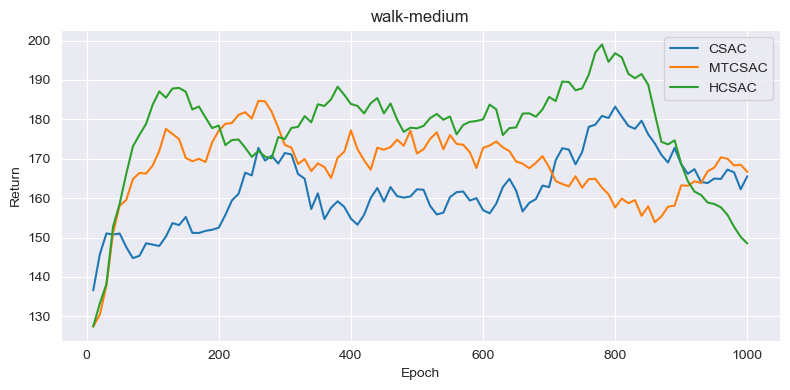

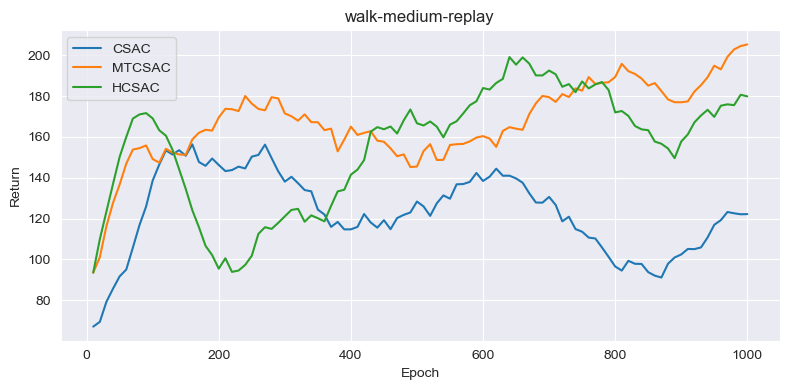

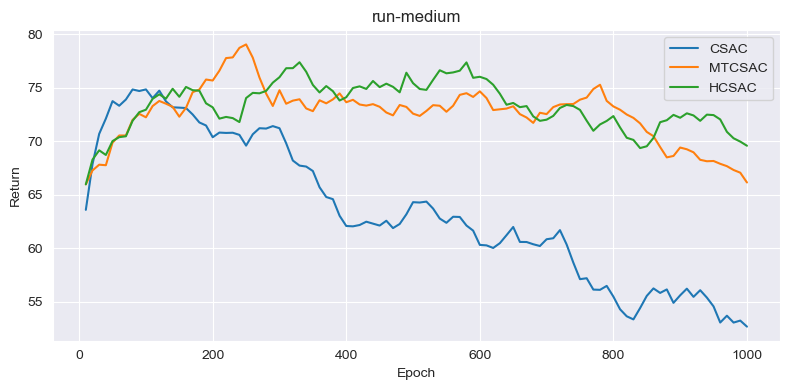

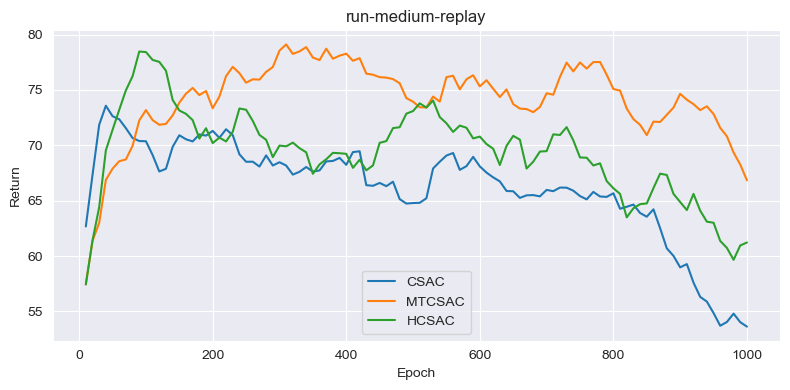

                             RSP           CSAC         MTCSAC          HCSAC
walk-medium         32.89 ± 0.54  163.56 ± 0.00  155.90 ± 0.00  181.27 ± 0.00
run-medium          23.43 ± 0.78   76.45 ± 0.00   77.91 ± 0.00   78.82 ± 0.00
walk-medium-replay  32.89 ± 0.54  106.64 ± 0.00  165.82 ± 0.00  171.66 ± 0.00
run-medium-replay   23.43 ± 0.78   77.80 ± 0.00   74.90 ± 0.00   66.63 ± 0.00


In [7]:
def smooth(array, window=10):
    array = np.pad(array, (0, window - 1), mode='edge')
    return np.convolve(array, np.ones(window) / window, mode='valid')

table = pd.DataFrame(
    index=['walk-medium', 'run-medium', 'walk-medium-replay', 'run-medium-replay'],
    columns=['RSP', 'CSAC', 'MTCSAC', 'HCSAC']
)
for task in ['walk', 'run']:
    for dataset in ['medium', 'medium-replay']:
        plt.figure(figsize=(8, 4))
        for agent in ['rsp', 'csac', 'mtcsac', 'hcsac']:
            exec(f'record = {agent}_record')
            result_mean = np.mean(record[f"{task}-{dataset}"]['result'])
            result_std = np.std(record[f"{task}-{dataset}"]['result'])
            table.loc[f'{task}-{dataset}', agent.upper()] = f'{result_mean:.2f} ± {result_std:.2f}'
            if agent == 'rsp':
                continue
            epoch_list = np.mean(record[f"{task}-{dataset}"]['epoch'], axis=0)
            return_mean = np.mean(record[f"{task}-{dataset}"]['return'], axis=0)
            return_std = np.std(record[f"{task}-{dataset}"]['return'], axis=0)
            return_center = smooth(return_mean)
            return_upper = smooth(return_mean + return_std)
            return_lower = smooth(return_mean - return_std)
            plt.plot(epoch_list, return_center, label=f'{agent.upper()}')
            plt.fill_between(epoch_list, return_lower, return_upper, alpha=0.2)
        plt.title(f'{task}-{dataset}')
        plt.xlabel('Epoch')
        plt.ylabel('Return')
        plt.tight_layout()
        plt.legend()
        plt.show()
print(table)